<a href="https://colab.research.google.com/github/AgnesMachau/Moringa-Projects/blob/master/Copy_of_Untitled5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. **Defining the question.** 
##**a) Specifying the question**
Which individuals are most likely to have or use a bank account?





##**b) Defining the metric for success**

##**c) Understanding the context**

##**d) Recording the Experimental design.**

##**e) Data relevance**

2( 

In [ ]:
#loading packages that will help us carry out the analysis.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt

In [ ]:
#loading the data file to a python environment.
#viewing the first five entries of the dataset

financial_df = pd.read_csv('Financial Dataset - 1.csv')
financial_df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [ ]:
#viewing the last 5 entries of the dataset
financial_df.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [ ]:
financial_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


In [ ]:
financial_df.describe()

,year,household_size,Respondent Age
count,23524.000000,23496.000000,23490.000000
mean,2016.979000,3.681818,38.804300
std,0.899669,2.279933,16.519996
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2056.000000,21.000000,100.000000


In [ ]:
financial_df.describe(include='all')

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
count,23510,23524.000000,23524,23488,23509,23513,23496.000000,23490.000000,23490,23520,23492,23495,23494
unique,4,NaN,8735,2,2,2,NaN,NaN,2,6,5,7,10
top,Rwanda,NaN,uniqueid_1872,No,Rural,Yes,NaN,NaN,Female,Head of Household,Married/Living together,Primary education,Self employed
freq,8735,NaN,4,20179,14338,17449,NaN,NaN,13859,12829,10739,12775,6428
mean,NaN,2016.979000,NaN,NaN,NaN,NaN,3.681818,38.804300,NaN,NaN,NaN,NaN,NaN
std,NaN,0.899669,NaN,NaN,NaN,NaN,2.279933,16.519996,NaN,NaN,NaN,NaN,NaN
min,NaN,2016.000000,NaN,NaN,NaN,NaN,0.000000,16.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,2016.000000,NaN,NaN,NaN,NaN,2.000000,26.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,2017.000000,NaN,NaN,NaN,NaN,3.000000,35.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,2018.000000,NaN,NaN,NaN,NaN,5.000000,49.000000,NaN,NaN,NaN,NaN,NaN


In [ ]:
financial_df.shape

(23524, 13)

In [ ]:

financial_df.country.count()

23510

In [ ]:
financial_df.columns

Index(['country', 'year', 'uniqueid', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'The relathip with head', 'marital_status',
       'Level of Educuation', 'Type of Job'],
      dtype='object')

In [ ]:
financial_df.nunique()

country                      4
year                         6
uniqueid                  8735
Has a Bank account           2
Type of Location             2
Cell Phone Access            2
household_size              21
Respondent Age              85
gender_of_respondent         2
The relathip with head       6
marital_status               5
Level of Educuation          7
Type of Job                 10
dtype: int64

In [ ]:
financial_df.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

In [ ]:
from datetime import datetime
financial_df['year'] = financial_df['year'].astype('str')
financial_df['year'] =  pd.to_datetime(financial_df['year'],format='%Y-%m-%d')
financial_df.dtypes

country                           object
year                      datetime64[ns]
uniqueid                          object
Has a Bank account                object
Type of Location                  object
Cell Phone Access                 object
household_size                   float64
Respondent Age                   float64
gender_of_respondent              object
The relathip with head            object
marital_status                    object
Level of Educuation               object
Type of Job                       object
dtype: object

In [ ]:
financial_df.columns = financial_df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
financial_df.rename({'has_a_bank_account': 'bank_account', 'type_of_location': 'urban/rural','cell_phone_access' : 'phone_access','the_relathip_with_head' : 'relationship_with_head', 'level_of_educuation' : 'education_level'}, axis=1, inplace=True)
financial_df.head()

,country,year,uniqueid,bank_account,urban/rural,phone_access,household_size,respondent_age,gender_of_respondent,relationship_with_head,marital_status,education_level,type_of_job
0,Kenya,2018-01-01,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018-01-01,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018-01-01,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018-01-01,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018-01-01,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [ ]:
financial_df.drop(['uniqueid'], axis=1)

,country,year,bank_account,urban/rural,phone_access,household_size,respondent_age,gender_of_respondent,relationship_with_head,marital_status,education_level,type_of_job
0,Kenya,2018-01-01,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018-01-01,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018-01-01,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018-01-01,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018-01-01,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018-01-01,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018-01-01,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018-01-01,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018-01-01,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed


In [ ]:
financial_df.isnull().sum()
financial_df.dropna(inplace=True)
financial_df.shape

(23343, 13)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


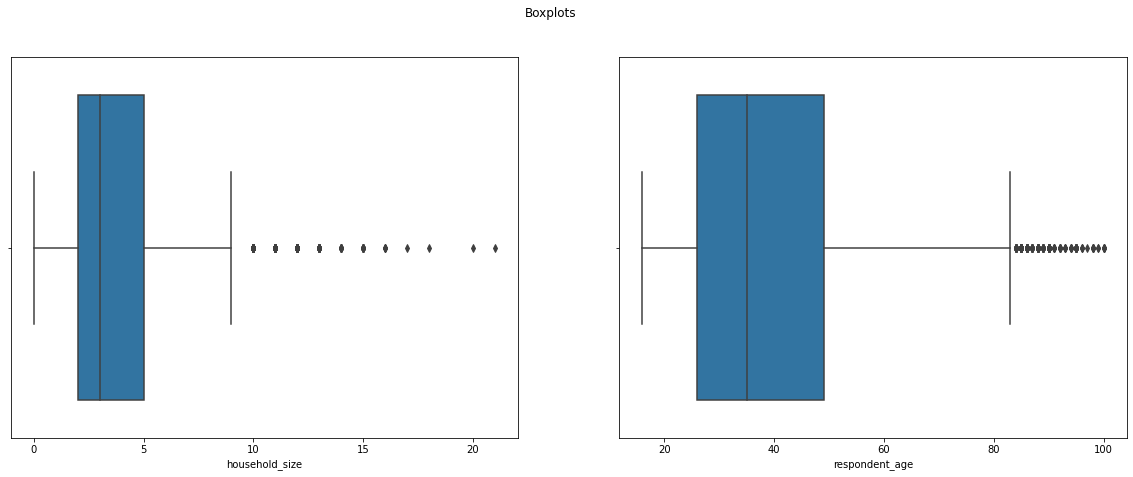

In [ ]:
fig, ((ax1, ax2)) = plt.subplots(1,2,figsize=(20,7))
fig.suptitle('Boxplots')
sns.boxplot(financial_df['household_size'], ax=ax1)
sns.boxplot(financial_df['respondent_age'], ax=ax2)
plt.show()     

In [ ]:
q1_h = financial_df['household_size'].quantile(.25)
q3_h = financial_df['household_size'].quantile(.75)

iqr_h = q3_h - q1_h
q1 = financial_df['household_size'].quantile(.25)
q3= financial_df['household_size'].quantile(.75)
iqr = q3 - q1
l_bound = q1 - (1.5*iqr)
u_bound = q3 + (1.5 * iqr)
print(iqr_h, iqr)

3.0 3.0


In [ ]:
q1_h = financial_df['respondent_age'].quantile(.25)
q3_h = financial_df['respondent_age'].quantile(.75)

iqr_h = q3_h - q1_h
q1 = financial_df['respondent_age'].quantile(.25)
q3= financial_df['respondent_age'].quantile(.75)
iqr = q3 - q1
l_bound = q1 - (1.5*iqr)
u_bound = q3 + (1.5 * iqr)
print(iqr_h, iqr)

23.0 23.0


###**Categorical variables**
###**a) Frequency tables**


In [ ]:
financial_df['bank_account'].value_counts()

No     20046
Yes     3297
Name: bank_account, dtype: int64

In [ ]:
financial_df['marital_status'].value_counts()

Married/Living together    10700
Single/Never Married        7903
Widowed                     2683
Divorced/Seperated          2049
Dont know                      8
Name: marital_status, dtype: int64

In [ ]:
financial_df['phone_access'].value_counts()

Yes    17334
No      6009
Name: phone_access, dtype: int64

###**b) Bar charts, Histograms, line charts and area charts.**

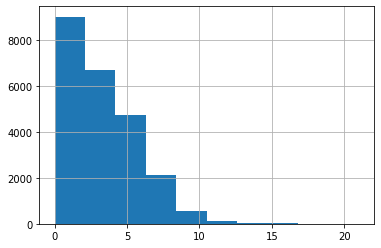

In [ ]:
financial_df['household_size'].hist()


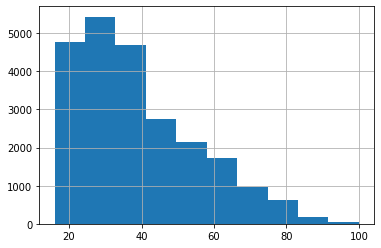

In [ ]:
financial_df['respondent_age'].hist()

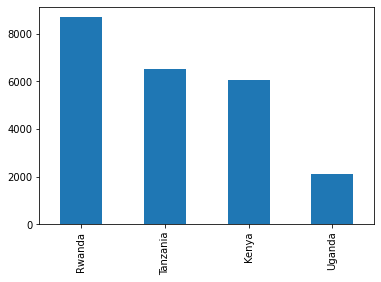

In [ ]:
financial_df['country'].value_counts().head(10).plot.bar()

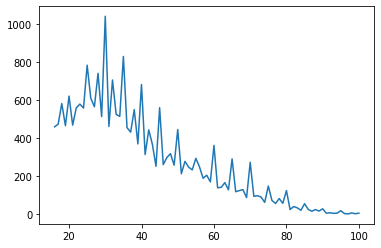

In [ ]:
financial_df['respondent_age'].value_counts().sort_index().plot.line()

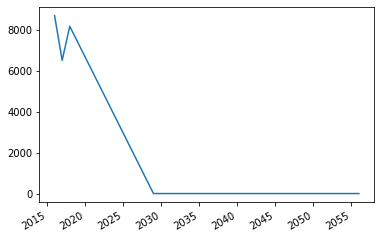

In [ ]:
financial_df['year'].value_counts().sort_index().plot.line()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


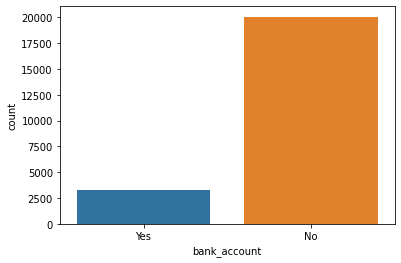

In [ ]:
sns.countplot(financial_df['bank_account'])

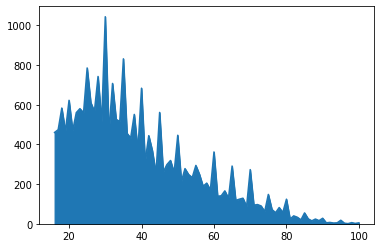

In [ ]:
financial_df['respondent_age'].value_counts().sort_index().plot.area()

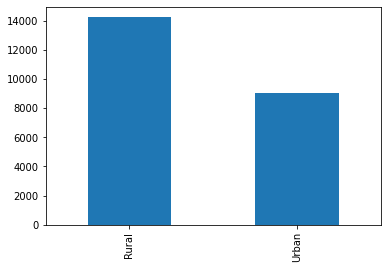

In [ ]:
financial_df['urban/rural'].value_counts().plot.bar()

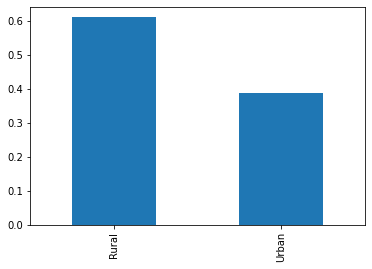

In [ ]:
(financial_df['urban/rural'].value_counts()/len(financial_df)).plot.bar()

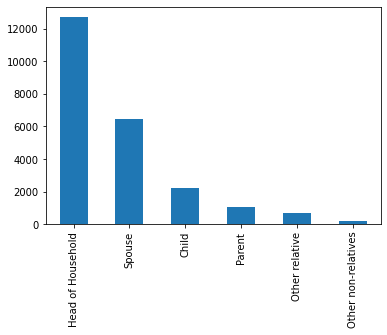

In [ ]:
financial_df['relationship_with_head'].value_counts().plot.bar()

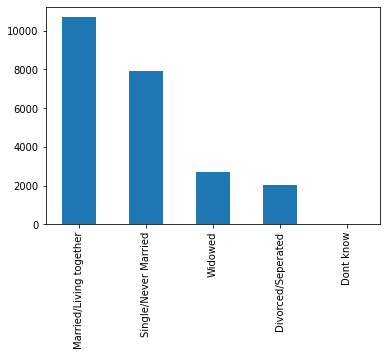

In [ ]:
financial_df['marital_status'].value_counts().plot.bar()

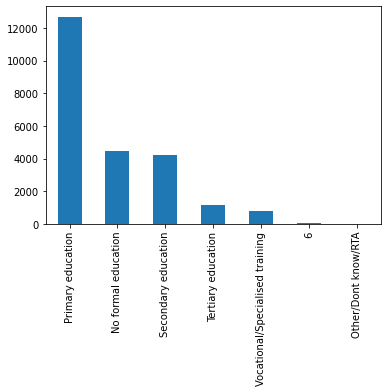

In [ ]:
financial_df['education_level'].value_counts().plot.bar()

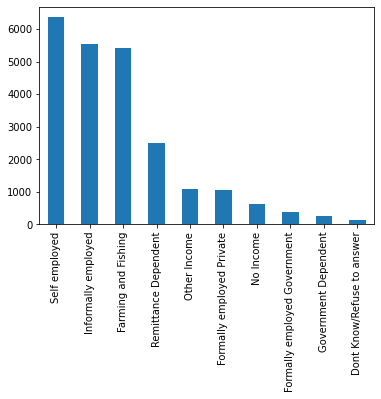

In [ ]:
financial_df['type_of_job'].value_counts().plot.bar()

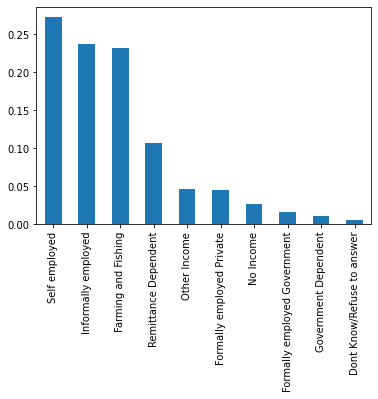

In [ ]:
(financial_df['type_of_job'].value_counts()/len(financial_df)).plot.bar()

##**Measures of central tendency**

In [ ]:
print('Means: ')
print(financial_df['household_size'].mean())
print(financial_df['respondent_age'].mean())



Means: 
3.6886432763569377
38.80550914621085


In [ ]:
financial_df.mode()
print(financial_df.mode())

     country       year  ...    education_level    type_of_job
0     Rwanda 2016-01-01  ...  Primary education  Self employed
1        NaN        NaT  ...                NaN            NaN
2        NaN        NaT  ...                NaN            NaN
3        NaN        NaT  ...                NaN            NaN
4        NaN        NaT  ...                NaN            NaN
...      ...        ...  ...                ...            ...
2070     NaN        NaT  ...                NaN            NaN
2071     NaN        NaT  ...                NaN            NaN
2072     NaN        NaT  ...                NaN            NaN
2073     NaN        NaT  ...                NaN            NaN
2074     NaN        NaT  ...                NaN            NaN

[2075 rows x 13 columns]


In [ ]:
print('Medians: ')
print(financial_df['household_size'].median())
print(financial_df['respondent_age'].median())


Medians: 
3.0
35.0


###**Measures of Dispersion/Variability/Spread**

In [ ]:
#Standard deviations
print('Standard deviation: ')
print(financial_df['respondent_age'].std())
print(financial_df['household_size'].std())

Standard deviation: 
16.51980349804178
2.2811835250351495


In [ ]:
#Variances
print(financial_df['respondent_age'].var())
print(financial_df['household_size'].var())

272.90390761391353
5.20379827489179


In [ ]:
#Finding the range of the household_size
financial_df_max = financial_df["household_size"].max()
financial_df_min = financial_df["household_size"].min()
financial_df_max - financial_df_min

21.0

In [ ]:
#Finding the range of the respondent age
financial_df_max = financial_df["respondent_age"].max()
financial_df_min = financial_df["respondent_age"].min()
financial_df_max - financial_df_min


84.0

In [ ]:
#Finding the quatiles
print('Quatiles')
print(financial_df["household_size"].quantile([0.25,0.5,0.75]))
print(financial_df["respondent_age"].quantile([0.25,0.5,0.75]))

Quatiles
0.25    2.0
0.50    3.0
0.75    5.0
Name: household_size, dtype: float64
0.25    26.0
0.50    35.0
0.75    49.0
Name: respondent_age, dtype: float64


In [ ]:
#Determining the skewness 
print('Skewness')
print(financial_df["household_size"].skew())
print(financial_df["respondent_age"].skew())

Skewness
0.9741086837897069
0.840661747532081


In [ ]:
#Determining the kurtosis 
print('Kurtosis')
print(financial_df["household_size"].kurt())
print(financial_df["respondent_age"].kurt())

Kurtosis
1.1538690689335573
0.09844652254807196


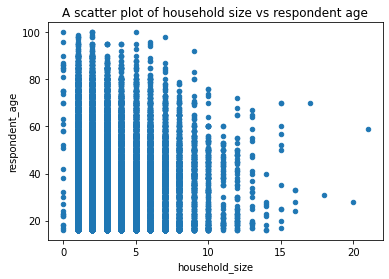

In [ ]:
financial_df.plot(x = 'household_size', y = 'respondent_age', kind = 'scatter')
plt.xlabel('household_size')
plt.ylabel('respondent_age')
plt.title('A scatter plot of household size vs respondent age')
plt.show()

In [ ]:
financial_df['household_size'].corr(financial_df['respondent_age'])

-0.11970919507762415

In [ ]:
corrMatrix = financial_df.corr()
corrMatrix

,household_size,respondent_age
household_size,1.000000,-0.119709
respondent_age,-0.119709,1.000000


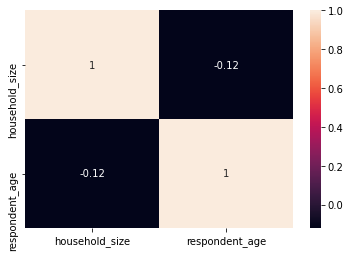

In [ ]:

corelation = financial_df.corr()
sns.heatmap(corelation,xticklabels = corelation.columns, yticklabels = corelation.columns, annot=True)

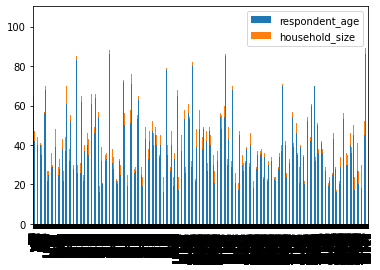

In [ ]:

financial_df[['respondent_age', 'household_size']].plot(kind='bar', stacked=True)